In [5]:
##MONA'S CODE! 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
res_data = pd.ExcelFile('../Workspace/DataDownload.xls')
restaurant_df = pd.read_excel(res_data, 'RESTAURANTS')

restaurant_df = restaurant_df.rename(columns={'FFR09':'Fast Food Restaurants 2009',
                                              'FFR14':'Fast Food Restaurants 2014',
                                              'PCH_FFR_09_14':'Fast-food restaurants (% change)',
                                              'FFRPTH09':'Fast-food restaurants/1,000 pop 2009',
                                              'FFRPTH14':'Fast-food restaurants/1,000 pop 2014',
                                              'PCH_FFRPTH_09_14':'Fast-food restaurants/1,000 pop (% change)'})
restaurant_df.head()
#This dataframe is just reading in the excel file

,FIPS,State,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),"Fast-food restaurants/1,000 pop 2009","Fast-food restaurants/1,000 pop 2014","Fast-food restaurants/1,000 pop (% change)",FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [7]:
ff_df=fast_food_df[['FIPS',
                    'State',
                    'County',
                    'Fast Food Restaurants 2009',
                    'Fast Food Restaurants 2014',
                    'Fast-food restaurants (% change)',
                    'Fast-food restaurants/1,000 pop 2009',
                    'Fast-food restaurants/1,000 pop 2014',
                    'Fast-food restaurants/1,000 pop (% change)']].copy()
ff_df.head()
#This is creating a new dataframe with only the data of interest. 

,FIPS,State,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),"Fast-food restaurants/1,000 pop 2009","Fast-food restaurants/1,000 pop 2014","Fast-food restaurants/1,000 pop (% change)"
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035


In [8]:
for index,row in ff_df.iterrows():
    total_gr = row['Fast-food restaurants (% change)']
    yr_gr = total_gr/5
    ff_df.set_value(index,'Yearly Growth Rate %',yr_gr)
    ff09 = row['Fast Food Restaurants 2009']
    ff14 = row['Fast Food Restaurants 2014']
    projection = round((ff14*(yr_gr/100)) + ff14,0)
    ff_df.set_value(index,'Fast Food Restaurants 2015 (PROJECTED)',projection)
ff_df.head()
#This is now the updated dataframe that has the yearly growth rate per county and the PROJECTED fast food restaurant per county 2015

,FIPS,State,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),"Fast-food restaurants/1,000 pop 2009","Fast-food restaurants/1,000 pop 2014","Fast-food restaurants/1,000 pop (% change)",Yearly Growth Rate %,Fast Food Restaurants 2015 (PROJECTED)
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,4.000000,37.0
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,3.571429,137.0
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,0.952381,22.0
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,-5.714286,5.0
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,-2.500000,20.0


In [28]:
# ff_df['County'] = ff_df['County'] + ' County'

In [29]:
ff_df.head()

,FIPS,Abbreviation,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),Yearly Growth Rate %,Fast Food Restaurants 2015 (PROJECTED)
0,1001,AL,Autauga County,30,36,20.000000,4.000000,37.0
1,1003,AL,Baldwin County,112,132,17.857143,3.571429,137.0
2,1005,AL,Barbour County,21,22,4.761905,0.952381,22.0
3,1007,AL,Bibb County,7,5,-28.571429,-5.714286,5.0
4,1009,AL,Blount County,24,21,-12.500000,-2.500000,20.0


In [12]:
# del ff_df['Fast-food restaurants/1,000 pop 2009']
# del ff_df['Fast-food restaurants/1,000 pop 2014']
# del ff_df['Fast-food restaurants/1,000 pop (% change)']

In [13]:
resbystate15 = ff_df.groupby(["State"])['Fast Food Restaurants 2015 (PROJECTED)'].sum()
resbystate14 =  ff_df.groupby(["State"])['Fast Food Restaurants 2014'].sum()
resbystate15.head(20)
resbystate=pd.DataFrame({'Abbreviation':resbystate15.index,'Fast Food Restaurant Count 2014':resbystate14.values, 'Fast Food Restaurant Count 2015 (prj)':resbystate15.values}).copy()
resbystate.head()
#this dataframe shows us the totals of restaurants PER state AND the projected volumes

,Abbreviation,Fast Food Restaurant Count 2014,Fast Food Restaurant Count 2015 (prj)
0,AK,429,425.0
1,AL,3561,3626.0
2,AR,1939,1963.0
3,AZ,4211,4241.0
4,CA,28292,28842.0


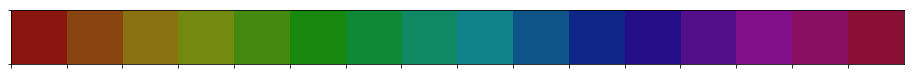

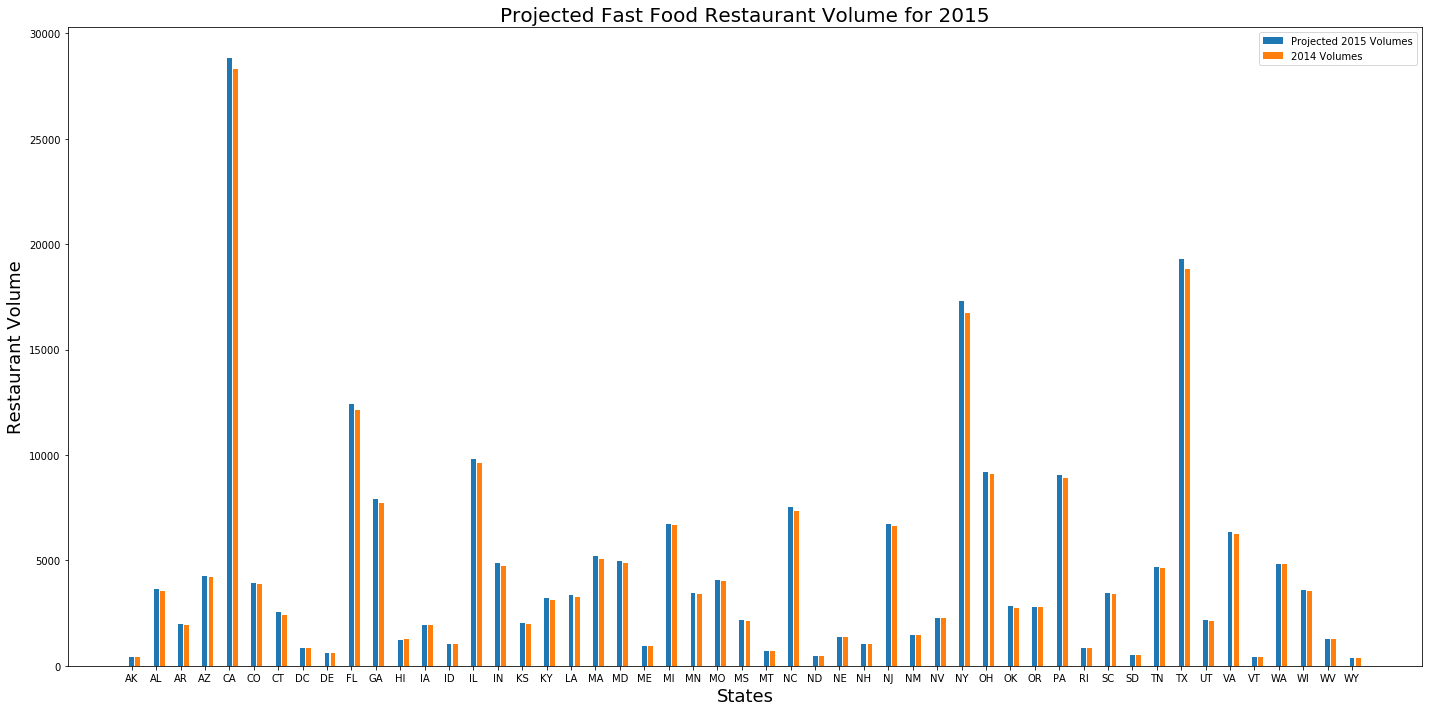

In [177]:
sns.palplot(sns.hls_palette(16, l=.3, s=.8))
plt.figure(figsize=(20,10))
x_axis = np.arange(len(resbystate))
tick_locations = [value for value in x_axis]
ff1=plt.bar(x_axis, resbystate['Fast Food Restaurant Count 2015 (prj)'], width = 0.2,align='center',label='Projected 2015 Volumes')
ff2=plt.bar(x_axis + 0.25, resbystate['Fast Food Restaurant Count 2014'], width = 0.2,align='center',label='2014 Volumes')

plt.xticks(tick_locations, resbystate['Abbreviation'], rotation="horizontal")
plt.title('Projected Fast Food Restaurant Volume for 2015',size=20)
plt.xlabel('States',size=18)
plt.ylabel('Restaurant Volume',size=18)
plt.legend()
plt.tight_layout()
plt.savefig('Projected Fast Food Restaurant Volumes_2015_.png')
plt.show()

In [124]:
# ff_df=ff_df.rename(columns={'State':'Abbreviation'})
# ff_df.head()
countypop = pd.merge(ff_df,popDFmapped,how='inner',on=['Abbreviation','County'])

for index,row in countypop.iterrows():
    pop = row['Population']
    ffres14 = row['Fast Food Restaurants 2014']
    ffres15 = row['Fast Food Restaurants 2015 (PROJECTED)']
    ffpercap14 = ((ffres14/pop)*100)
    ffpercap15 = ((ffres15/pop)*100)
    ff_df.set_value(index,'Fast Food Restaurants Per Capita, 2014',ffpercap14)
    ff_df.set_value(index,'Fast Food Restaurants Per Capita, 2015',ffpercap15)
countypop.head()
#This dataframe merges population and county information with the county and 2015 restaurant volumes (per county)

,FIPS,Abbreviation,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),Yearly Growth Rate %,Fast Food Restaurants 2015 (PROJECTED),"Fast Food Restaurants Per Capita, 2014","Fast Food Restaurants Per Capita, 2015",Population,State Code (FIPS),County Code (FIPS),State
0,1003,AL,Baldwin County,112,132,17.857143,3.571429,137.0,0.089869,0.091614,208563,1,3,Alabama
1,1015,AL,Calhoun County,95,103,8.421053,1.684211,105.0,0.097343,0.099466,114611,1,15,Alabama
2,1043,AL,Cullman County,50,53,6.000000,1.200000,54.0,0.021884,0.021884,82471,1,43,Alabama
3,1049,AL,DeKalb County,41,43,4.878049,0.975610,43.0,0.065543,0.066062,70900,1,49,Alabama
4,1051,AL,Elmore County,29,45,55.172414,11.034483,50.0,0.055542,0.056030,81799,1,51,Alabama


In [182]:
#Need to groupby the states in the countypop dataframe so that we can normalize this all 

normalizedres = countypop[['FIPS','Abbreviation','Fast Food Restaurants 2009','Fast Food Restaurants 2014','Fast Food Restaurants 2015 (PROJECTED)', 'Population']].copy()
normalizedres.head()
normalizedres = normalizedres.groupby(['Abbreviation'])['Fast Food Restaurants 2015 (PROJECTED)','Population'].sum()
normalizedres.reset_index(level=['Abbreviation'],inplace=True)

normalizedres.head()

,Abbreviation,Fast Food Restaurants 2015 (PROJECTED),Population
0,AL,2907.0,3630681
1,AR,1234.0,1673132
2,AZ,4148.0,6764001
3,CA,28573.0,38745526
4,CO,3418.0,4755954


In [183]:
for index,row in normalizedres.iterrows():
    popu = row['Population']
    ff2015 = row['Fast Food Restaurants 2015 (PROJECTED)']
    percap = (ff2015/popu)*100
    normalizedres.set_value(index,'Per Capita Fast Food Restaurants',percap)
    
normalizedres.head()

,Abbreviation,Fast Food Restaurants 2015 (PROJECTED),Population,Per Capita Fast Food Restaurants
0,AL,2907.0,3630681,0.080068
1,AR,1234.0,1673132,0.073754
2,AZ,4148.0,6764001,0.061325
3,CA,28573.0,38745526,0.073745
4,CO,3418.0,4755954,0.071868


In [184]:
top10 = normalizedres.sort_values('Per Capita Fast Food Restaurants',ascending=False).head(10)
bottom10 = normalizedres.sort_values('Per Capita Fast Food Restaurants',ascending=False).tail(10)
top10

,Abbreviation,Fast Food Restaurants 2015 (PROJECTED),Population,Per Capita Fast Food Restaurants
46,WV,653.0,731019,0.089327
31,NY,16669.0,18741516,0.088942
9,HI,1244.0,1428462,0.087087
22,MS,1130.0,1323725,0.085365
38,SD,252.0,296690,0.084937
33,OK,2036.0,2426888,0.083893
32,OH,8003.0,9756400,0.082028
15,KY,1781.0,2173786,0.081931
8,GA,6392.0,7810581,0.081838
0,AL,2907.0,3630681,0.080068


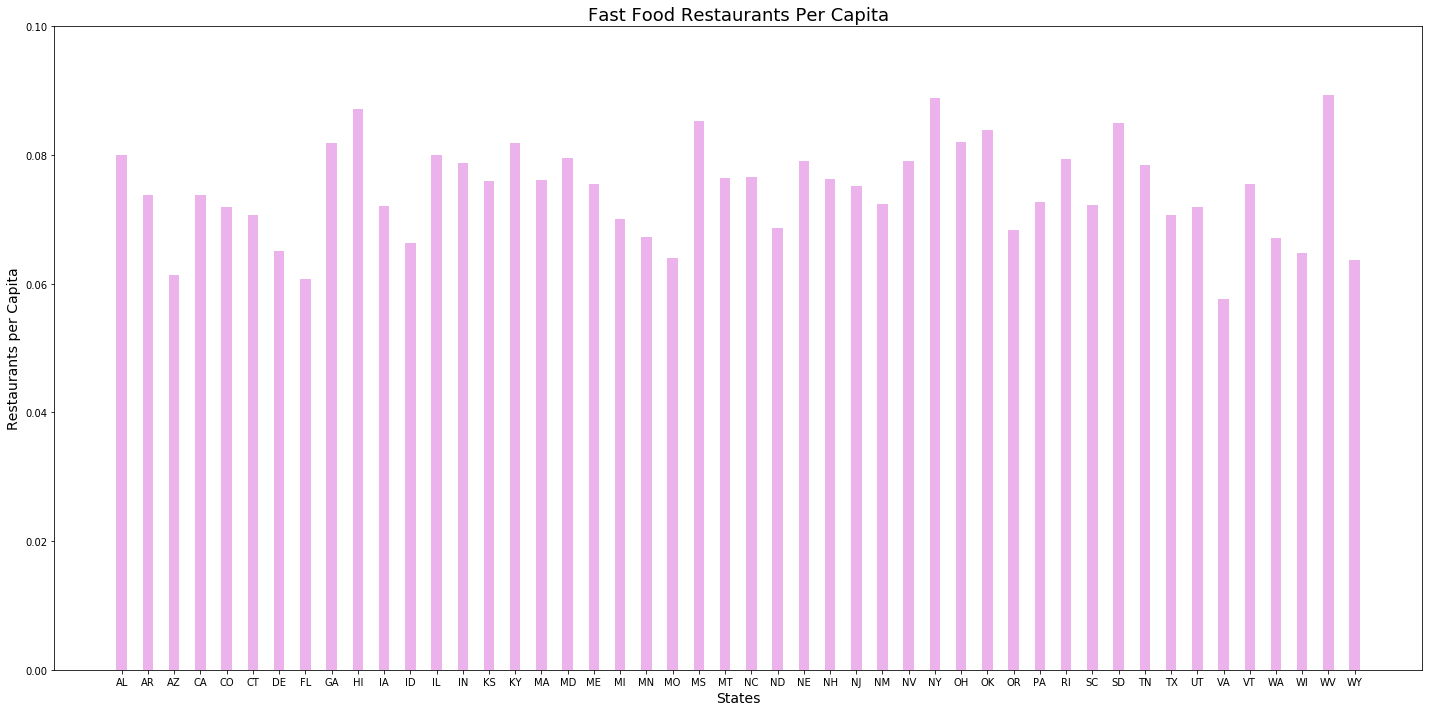

In [188]:
##creating bar chart to show the relation between states with most restaurants per capita
plt.figure(figsize=(20,10))
x_axis=np.arange(len(normalizedres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, normalizedres['Abbreviation'], rotation="horizontal")
plt.bar(x_axis,normalizedres['Per Capita Fast Food Restaurants'],color='m',alpha=0.3,width = 0.4,align='center')
plt.title('Fast Food Restaurants Per Capita',size=18)
plt.xlabel('States',size=14)
plt.ylabel('Restaurants per Capita',size=14)
plt.savefig('Fast_Food_Restaurants_Per_Capita_.png')
plt.tight_layout()
plt.ylim(0.0,0.1)
plt.show()

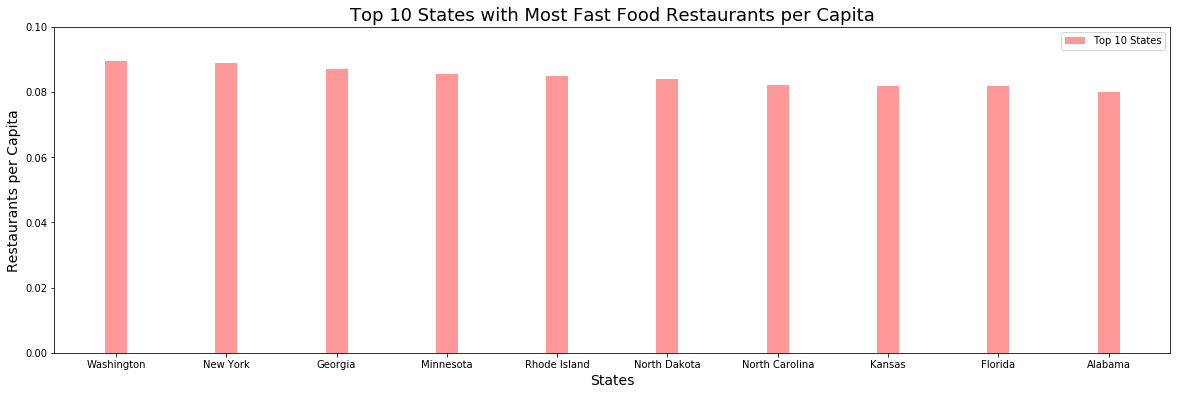

In [169]:
plt.figure(figsize=(20,6))
x_axis=np.arange(len(top10))
tick_locations = [value for value in x_axis]
t1=plt.xticks(tick_locations, top10['State'], rotation="horizontal")
t10=plt.bar(x_axis,top10['Per Capita Fast Food Restaurants'],color='r',alpha=0.4,width = 0.2,align='center',label='Top 10 States')
plt.legend()
plt.ylim(0.0,0.1)
plt.title('Top 10 States with Most Fast Food Restaurants per Capita',size=18)
plt.xlabel('States',size=14)
plt.ylabel('Restaurants per Capita',size=14)
plt.savefig('Top10States.png')
plt.show()

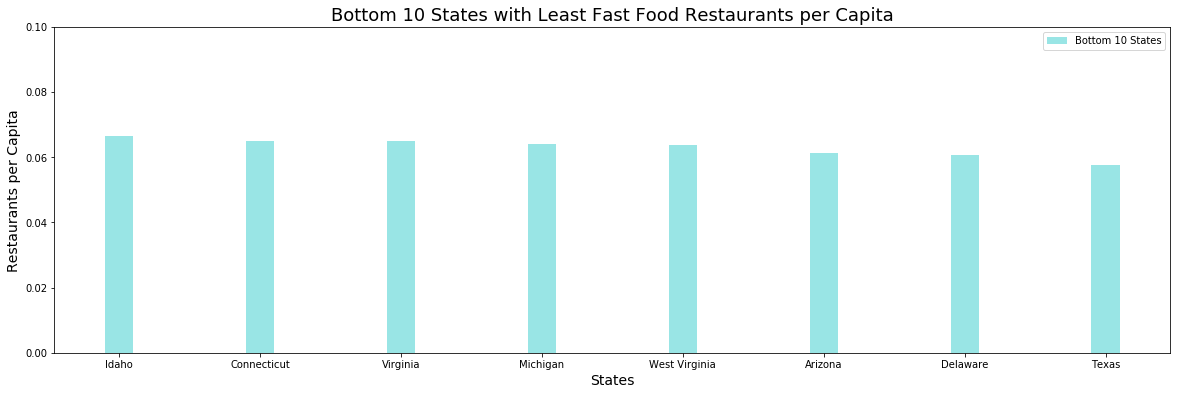

In [171]:
plt.figure(figsize=(20,6))
x_axis2 = np.arange(len(bottom10))
tick_locations2 = [value for value in x_axis2]
b1=plt.xticks(tick_locations2,bottom10['State'], rotation="horizontal")
b10=plt.bar(x_axis2,bottom10['Per Capita Fast Food Restaurants'],color='c',alpha=0.4,width = 0.2,align='center',label='Bottom 10 States')
plt.legend()
plt.title('Bottom 10 States with Least Fast Food Restaurants per Capita',size=18)
plt.xlabel("States",size=14)
plt.ylabel('Restaurants per Capita',size=14)
plt.ylim(0.0,0.1)
plt.savefig('Bottom10_States.png')
plt.show()